## Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset from keras

In [2]:
 (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

## Checking the dimension of the image (pixel)

In [5]:
X_train[0].shape

(28, 28)

### Observation 1:
            the image's pixel is in 28 x 28 dimension

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Observation 3:
                0 -> black
                255 -> white
                And the other numbers denotes the white shade thickness

## Plotting the image

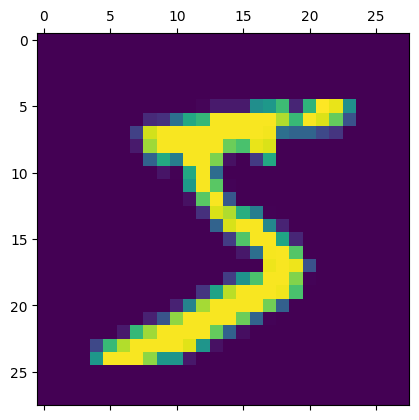

In [7]:
plt.matshow(X_train[0])

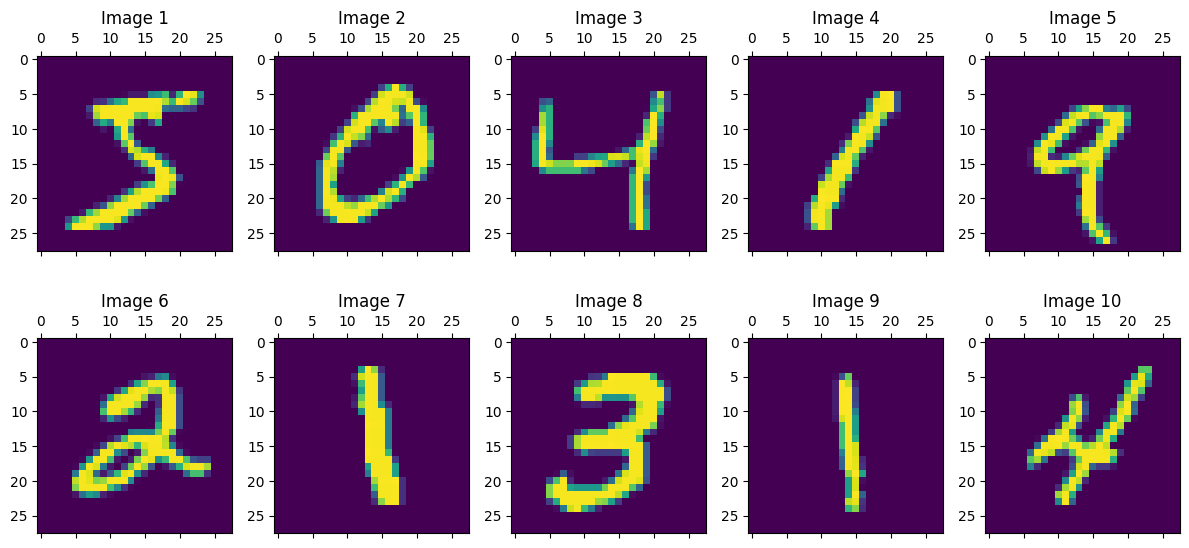

In [33]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

# Flatten the axes array
axes = axes.flatten()

# Loop through each subplot and plot the image
for i in range(10):
    ax = axes[i]
    ax.matshow(X_train[i])
    ax.set_title(f'Image {i+1}')

# Hide any empty subplots
if len(axes) > 10:
    for j in range(10, len(axes)):
        axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Data in y_train

In [9]:
y_train[0]

5

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Flatten the train set

In [11]:
X_train.shape

(60000, 28, 28)

### Scaling the input array
                All the values in the array are ranges from 0 to 255 so we can divide the array by 255 to get more accuracy

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
# flattening the array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)                        

In [14]:
# why 28*28 because 1 dim means 1 x 1 
# so that we should have only 1 row & col

In [15]:
X_train_flattened.shape

(60000, 784)

### Obseravation:
            60000 -> total data points
            784 -> no of values in each data point (also be considered as neurons x1, x2, x3...xn)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Model Building

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',   
    metrics = 'accuracy'
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 986us/step - loss: 0.4734 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 971us/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 925us/step - loss: 0.2664 - accuracy: 0.9257


## Model Evaluation

In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2650 - accuracy: 0.9245


[0.26496076583862305, 0.9244999885559082]

### Observation:
            Accuracy without hidden layer is 92%

In [20]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 704us/step


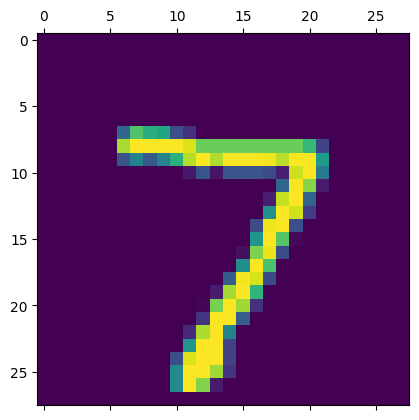

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted[0]

array([1.48395859e-02, 2.59332552e-07, 5.52550443e-02, 9.42218602e-01,
       2.06062570e-03, 1.18164495e-01, 1.50130847e-06, 9.99853015e-01,
       8.11170414e-02, 6.22898757e-01], dtype=float32)

In [23]:
# which has max value will be the output
np.argmax(y_predicted[0])

7

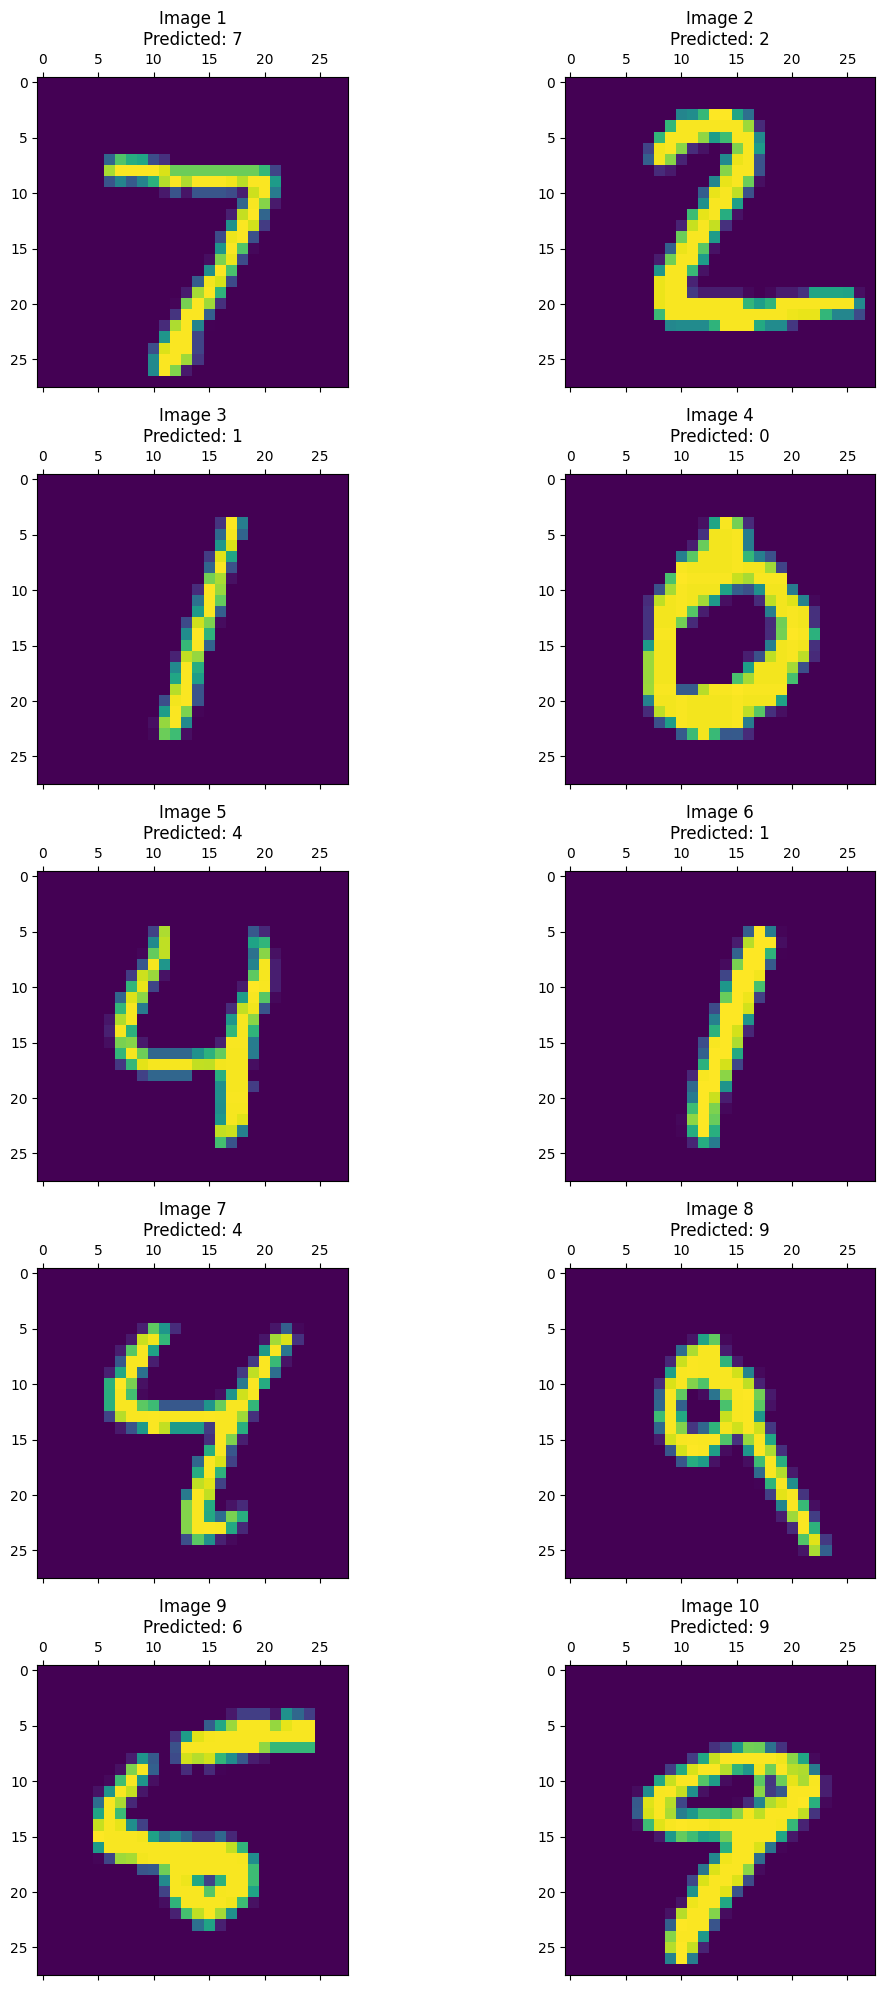

In [24]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop through each subplot and plot the image
for i in range(10):
    ax = axes[i]
    ax.matshow(X_test[i])
    predicted_label = np.argmax(y_predicted[i])
    ax.set_title(f'Image {i+1}\nPredicted: {predicted_label}')

# Hide any empty subplots
if len(axes) > 10:
    for j in range(10, len(axes)):
        axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Get the output and assign it to the new array called y_predicted_labels

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Observation:
            See the first 5 predicted outputs are same 

## Confusion Matrix

In [27]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    3,    2,    0,    6,    6,    2,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  927,   16,    8,    5,   12,   11,   37,    4],
       [   1,    0,   21,  920,    0,   26,    2,   13,   18,    9],
       [   1,    1,    6,    1,  919,    0,    9,    5,    9,   31],
       [   7,    2,    3,   33,   10,  783,   14,    7,   25,    8],
       [   8,    3,    7,    1,    8,   14,  913,    2,    2,    0],
       [   1,    5,   22,    4,    9,    0,    0,  955,    2,   30],
       [   5,   10,    8,   24,   10,   37,    8,   13,  847,   12],
       [   9,    7,    2,    8,   30,    8,    0,   31,    4,  910]])>

## Visualizing the confusion matrix

Text(95.72222222222221, 0.5, 'Acutal')

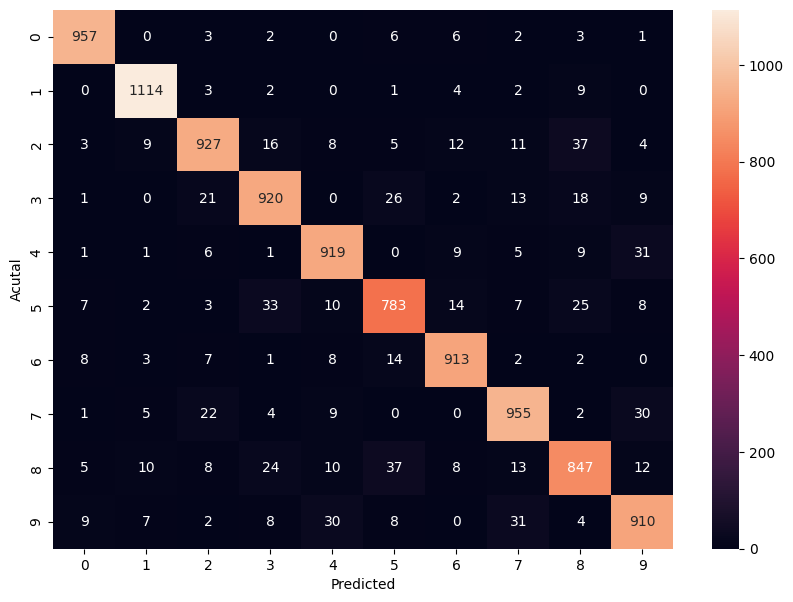

In [28]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Acutal')

### Observation:
            All the count of values in the diagonal are the right predicted count and all the others are errors

## Adding hidden layer to our model

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.1274 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 2s 988us/step - loss: 0.0880 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0514 - accuracy: 0.9847


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 873us/step - loss: 0.0853 - accuracy: 0.9746


[0.08527807891368866, 0.9746000170707703]

### Observation:
            Accuracy with the hidden layer is 97%

Text(95.72222222222221, 0.5, 'Acutal')

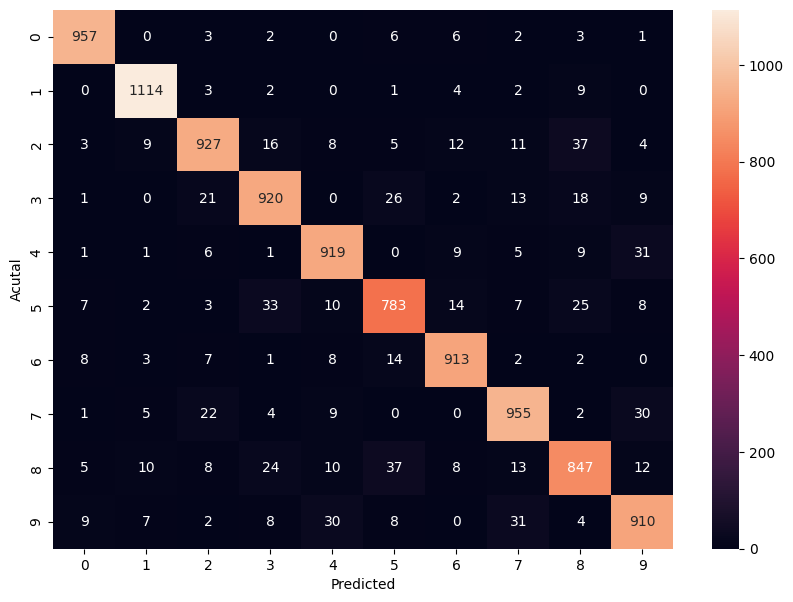

In [31]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Acutal')

## Keras have Flatten array layer we don't need to flatten by our own

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

# X_train_flattened to X_train
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2761 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1217 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0638 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0509 - accuracy: 0.9845


### Observation:
            No change in the accuracy (flattening the by our own and flatten by keras)